# 二元函数最大值

求解二元函数的最大值： $$y=y \cdot sin(2 \pi x)+x \cdot cos(2 \pi y)$$ 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import math
import random
from mpl_toolkits.mplot3d import Axes3D

## 1. 在[-2,2]×[-2,2]上画出函数图像

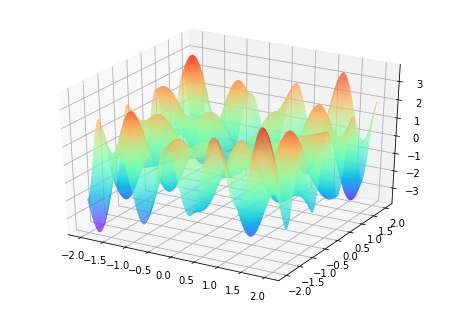

In [2]:
# 三维曲面显示
X=np.linspace(-2,2,500)
Y=np.linspace(-2,2,500)
XX, YY = np.meshgrid(X, Y)
Z=YY*np.sin(2*math.pi*XX)+XX*np.cos(2*math.pi*YY)
fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(XX, YY, Z,rstride=1, cstride=1, cmap='rainbow')
plt.show()

## 2. 模拟退火算法的关键函数

### 2.1 判断函数

In [3]:
def Judge(deltaE,T):
    if deltaE > 0:
        return 1
    else:
        probability = math.exp(deltaE/T)
        if probability > random.random():
            return 1
        else: 
            return 0

### 2.2 随机打扰

In [4]:
# X_LB:左下
# X_RT:右上
def Disturb(X_old,X_LB,X_RT):
    if random.random()<0.5:
        X_new[0] = X_old[0] - (X_old[0] - X_LB[0]) * random.random()
        X_new[1] = X_old[1] - (X_old[1] - X_LB[1]) * random.random()
    else:
        X_new[0] = X_old[0] + (X_RT[0] - X_old[0]) * random.random()
        X_new[1] = X_old[1] + (X_RT[1] - X_old[1]) * random.random()
        
    return X_new[0],X_new[1]

### 2.3 目标函数

In [5]:
def ObjFun(x,y):
    z = y*math.sin(2*math.pi*x)+x*math.cos(2*math.pi*y)
    return z

## 3.迭代过程

In [6]:
# 参数设置

# 搜索范围的上下界限
X_LB = np.array([-2,-2])
X_RT = np.array([2,2])

# 随机生成初始点的两个坐标
x_old = -2 + 4*random.random()
y_old = -2 + 4*random.random()
x_new = x_old
y_new = y_old

# 初始点
X_old = np.array([x_old,y_old])
# 初始点计算的目标函数
z_old = ObjFun(x_old,y_old)
# 更新点
X_new = np.array([x_new,y_new])
# 更新点计算的目标函数
z_new = ObjFun(x_new,y_new)

# high parameters
tmp = 1e5
tmp_min = 1e-3
alpha = 0.98
# 迭代次数
counter = 0

In [7]:
# 迭代过程记录
record_X = []
record_z = []

while (tmp >= tmp_min and counter <= 1000000):
    X_new[0],X_new[1] = Disturb(X_old,X_LB,X_RT)
    z_new = ObjFun(X_new[0],X_new[1])
    deltaE = z_new - z_old
    if Judge(deltaE,tmp) == 1 :
        X_old = X_new
        z_old = z_new # 更新当前函数
        record_X.append(X_new.copy())
        record_z.append(z_new) 
    if deltaE > 0 :
        tmp = tmp*alpha
    else:
        counter +=1
    

### 3.2 迭代动画

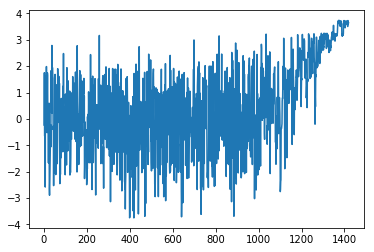

In [8]:
# 观察X和目标函数的变化
length = len(record_z)
index = [i+1 for i in range(length)]  #第i次迭代的值
# plt.plot(index,record_X[index][0])
# plt.plot(index,record_X[1])
plt.plot(index,record_z)

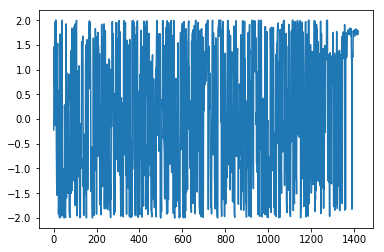

In [10]:
# 观察X和目标函数的变化
record_X_0 = [record_X[i][0] for i in range(length)]
plt.plot(index,record_X_0)

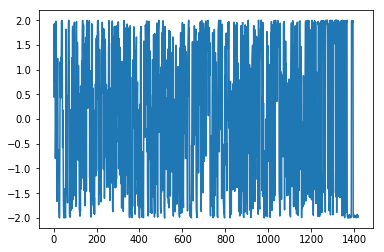

In [18]:
# 观察X和目标函数的变化
record_X_1 = [record_X[i][1] for i in range(length)]
plt.plot(index,record_X_1)

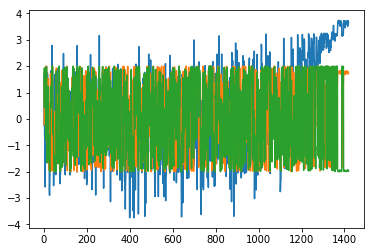

In [19]:
# 画到一张图中
plt.plot(index,record_z)
plt.plot(index,record_X_0)
plt.plot(index,record_X_1)